In [252]:
# Importing the necessery libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [253]:
# Read the data and store it in chosen variable
health_indicators = 'data_team-9/health_indicators.csv'
health_df = pd.read_csv(health_indicators)
covid19_file = 'data_team-9/worldometers_coronavirus.csv'
covid19_df = pd.read_csv(covid19_file)

In [254]:
# Displaying the top 5 rows of Health dataset
health_df.head()

,Country_Region,first_1ConfirmedCases,first_1Fatalities,first_10ConfirmedCases,first_50ConfirmedCases,first_100ConfirmedCases,cases_growth,death_growth,Cardiovascular diseases (%),Cancers (%),...,total fertility rate,obesity - adult prevalence rate,school_shutdown_1case,school_shutdown_10case,school_shutdown_50case,school_shutdown_1death,FF_DayOfYear,case1_DayOfYear,case10_DayOfYear,case50_DayOfYear
0,Afghanistan,2020-02-24,2020-03-22,2020-03-14,2020-03-24,2020-03-27,0.174179,0.083333,8.953006,3.372082,...,4.82,5.5,19.0,-0.0,-10.0,-8.0,82.0,55,74.0,84.0
1,Albania,2020-03-09,2020-03-11,2020-03-10,2020-03-16,2020-03-23,0.068699,0.130051,27.016784,13.225390,...,1.53,21.7,2.0,1.0,-5.0,-0.0,71.0,69,70.0,76.0
2,Algeria,2020-02-25,2020-03-12,2020-03-04,2020-03-16,2020-03-21,0.158588,0.228578,17.005476,6.481729,...,2.59,27.4,16.0,8.0,-4.0,-0.0,72.0,56,64.0,76.0
3,Andorra,2020-03-02,2020-03-22,2020-03-17,2020-03-19,2020-03-22,0.082774,0.345238,13.784688,17.879279,...,1.43,25.6,14.0,-1.0,-3.0,-6.0,82.0,62,77.0,79.0
4,Angola,2020-03-20,2020-03-29,NaN,NaN,NaN,0.132143,0.000000,4.480300,3.011632,...,5.96,8.2,4.0,NaN,NaN,-5.0,89.0,80,NaN,NaN


In [255]:
# Selecting the columns we need
health_df_q4 = health_df[["Country_Region","life expectancy at birth"]]
health_df_q4.tail()

,Country_Region,life expectancy at birth
175,Venezuela,71.0
176,Vietnam,74.4
177,West Bank and Gaza,NaN
178,Zambia,53.6
179,Zimbabwe,62.3


In [256]:
# Renaming the columns
health_df_q4 = health_df_q4.rename(columns={"Country_Region":"country_region","life expectancy at birth":"life_expectancy"})

In [257]:
health_df_q4.shape

(180, 2)

In [258]:
# Selecting the columns we need
covid19_df_q4 = covid19_df[['country_region', 'total_deaths']]

In [259]:
covid19_df_q4.head()

,country_region,total_deaths
0,Russia,"4,693"
1,Spain,"27,127"
2,UK,"38,489"
3,Italy,"33,415"
4,France,"28,802"


In [260]:
# Renaming the countries we need
health_df_q4["country_region"] = health_df_q4["country_region"].replace({"Taiwan*":"Taiwan","Korea, South":"S.Korea", 
                              "United Kingdom":"UK","US":"USA","Central African Republic":"CAR","Burma":"Myanmar",
                    "United Arab Emirates":"UAE","West Bank and Gaza":"Palestine"})

In [261]:
# We can see that it worked, because Qaza is changed to Palestine
health_df_q4.tail()

,country_region,life_expectancy
175,Venezuela,71.0
176,Vietnam,74.4
177,Palestine,NaN
178,Zambia,53.6
179,Zimbabwe,62.3


In [262]:
health_df_q4.country_region.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Myanmar', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'CAR', 'Chad',
       'Chile', 'China', 'Colombia', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana'

In [263]:
# Merging the two datasets 
merged_df = covid19_df_q4.merge(health_df_q4, on = ['country_region']) 
merged_df.head(10)

,country_region,total_deaths,life_expectancy
0,Russia,"4,693",71.9
1,Spain,"27,127",82.0
2,UK,"38,489",81.1
3,Italy,"33,415",82.5
4,France,"28,802",82.2
5,Germany,"8,605",81.1
6,Belgium,"9,467",81.4
7,Netherlands,"5,956",81.7
8,Belarus,235,73.8
9,Sweden,"4,395",82.4


In [264]:
# Dropping the missing values 
merged_df_q4= merged_df.dropna()

In [265]:
merged_df_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 168
Data columns (total 3 columns):
country_region     147 non-null object
total_deaths       147 non-null object
life_expectancy    147 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.6+ KB


In [266]:
# Changing total_deaths from object to int
# Creates an issue if you don't create a copy???
merged_df_q4 = merged_df_q4[merged_df_q4['total_deaths'].notnull()].copy()
merged_df_q4['total_deaths'] = merged_df_q4['total_deaths'].str.replace(',', '').astype(int)

In [267]:
merged_df_q4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 168
Data columns (total 3 columns):
country_region     147 non-null object
total_deaths       147 non-null int32
life_expectancy    147 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 4.0+ KB


In [268]:
merged_df_q4= merged_df_q4.sort_values("total_deaths",ascending=False)

In [274]:
# We can see that UK and USA are here, that means what names have been changed successfully.
merged_df_q4.head(10)

,country_region,total_deaths,life_expectancy
43,USA,106195,80.3
2,UK,38489,81.1
3,Italy,33415,82.5
109,Brazil,29314,74.7
4,France,28802,82.2
1,Spain,27127,82.0
45,Mexico,9779,76.7
6,Belgium,9467,81.4
5,Germany,8605,81.1
67,Iran,7797,74.5


In [269]:
# Dropping the outliers 
q_low = merged_df_q4['total_deaths'].quantile(0.05)
q_hi  = merged_df_q4['total_deaths'].quantile(0.95)

merged_df_q4_filtered = merged_df_q4[(merged_df_q4['total_deaths'] < q_hi) & (merged_df_q4['total_deaths'] > q_low)]
merged_df_q4_filtered.head()

,country_region,total_deaths,life_expectancy
5,Germany,8605,81.1
67,Iran,7797,74.5
44,Canada,7295,83.4
7,Netherlands,5956,81.7
65,India,5408,69.7


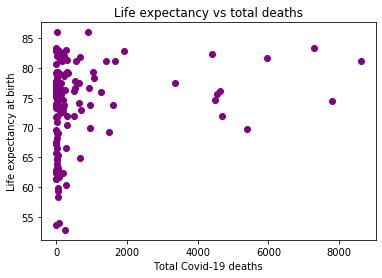

In [270]:
# show distribution of the results
plt.scatter(merged_df_q4_filtered["total_deaths"], merged_df_q4_filtered["life_expectancy"], color = 'purple')

plt.title("Life expectancy vs total deaths")
plt.xlabel("Total Covid-19 deaths")
plt.ylabel("Life expectancy at birth")
plt.show()

In [271]:
merged_df_q4_filtered.corr(method="pearson")

,total_deaths,life_expectancy
total_deaths,1.000000,0.198525
life_expectancy,0.198525,1.000000


In [272]:
import statsmodels.api as sm

In [273]:
X = merged_df_q4_filtered["life_expectancy"]
y = merged_df_q4_filtered["total_deaths"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_deaths   R-squared (uncentered):                   0.172
Model:                            OLS   Adj. R-squared (uncentered):              0.165
Method:                 Least Squares   F-statistic:                              26.73
Date:                Thu, 11 Jun 2020   Prob (F-statistic):                    8.67e-07
Time:                        23:04:42   Log-Likelihood:                         -1142.2
No. Observations:                 130   AIC:                                      2286.
Df Residuals:                     129   BIC:                                      2289.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
life_expectancy     9.7250      1.881      5.171      0.000       6.004      13.446
==============================================================================
Omnibus:                      109.485   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.850
Skew:                           3.186   Prob(JB):                    1.10e-162
Kurtosis:                      12.853   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""